# Solution Pandas // Fabby

### === Task 1 ===

1. Load the csv file "howlongwelive.csv" in the resources folder into dataframe

2. Print the first 2 rows, and last 2 rows

3. Print the shape

4. Print the feature names

5. Print the summary using describe()

6. Since Hepatatis B has a lot of nans, and highly correlate with Diptheria, simply drop column Hepatatis.  Also drop column Population since there are way too many nans (1 or 0pt)

7. Convert <code>Status</code> to 0 or 1, where 0 is developing

8. Rename column <code>thinness_1-19_years</code> to <code>thinness_10-19_years</code>

9. Grab all columns except life expectancy, and convert to numpy array called it X

10. Grab the column life expetancy and convert to numpy array and called it y

In [1]:
import pandas as pd

#======= 1 ========
df = pd.read_csv("../../Datasets/howlongwelive.csv")

#======= 2 ========
print(df[:2])
print(df[-2:])

#======= 3 ========
print(df.shape)

       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  

[2 rows x 2

In [2]:
#======= 4 ========
print(df.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


In [3]:
#======= 5 ========
print(df.describe())

              Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000

In [4]:
#======= 6 ========
df.drop(columns = 'Hepatitis B', inplace = True)
df.drop(columns = 'Population', inplace = True)
print(df.shape)
df.head()

(2938, 20)


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,18.2,18.2,0.454,9.5


In [5]:
#======= 7 ========
cond1 = df['Status'] == 'Developing'
cond2 = df['Status'] == 'Developed'

df['Status'].iloc[cond1] = 0
df['Status'].iloc[cond2] = 1

df['Status'].value_counts()

df.head()

/home/chanapa/pythonDSAI_env/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,0,65.0,263.0,62,0.01,71.279624,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1
1,Afghanistan,2014,0,59.9,271.0,64,0.01,73.523582,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,17.5,17.5,0.476,10.0
2,Afghanistan,2013,0,59.9,268.0,66,0.01,73.219243,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,17.7,17.7,0.470,9.9
3,Afghanistan,2012,0,59.5,272.0,69,0.01,78.184215,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,17.9,18.0,0.463,9.8
4,Afghanistan,2011,0,59.2,275.0,71,0.01,7.097109,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,18.2,18.2,0.454,9.5


In [6]:
#======= 8 ========
df.rename(columns={" thinness  1-19 years": "thinness_10-19_years"}, inplace="True")
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness_10-19_years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,0,65.0,263.0,62,0.01,71.279624,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1
1,Afghanistan,2014,0,59.9,271.0,64,0.01,73.523582,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,17.5,17.5,0.476,10.0
2,Afghanistan,2013,0,59.9,268.0,66,0.01,73.219243,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,17.7,17.7,0.470,9.9
3,Afghanistan,2012,0,59.5,272.0,69,0.01,78.184215,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,17.9,18.0,0.463,9.8
4,Afghanistan,2011,0,59.2,275.0,71,0.01,7.097109,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,18.2,18.2,0.454,9.5


In [7]:
#======= 9 ========
X = df.drop(columns = 'Life expectancy ').to_numpy()
print(X.shape)

(2938, 19)


In [8]:
#======= 10 ========
y = df['Life expectancy '].to_numpy()
print(y.shape)

(2938,)


### === Task 2 ===

1. Continuing "howlongwelive.csv", check whether which column has how many missing data

2. Fix all missing data using means

3. Perform a <code>groupby</code> country.  Which country has the lowest/highest life expectancy?

4. Perform a <code>groupby</code> status.  Is there any strong difference between developed and developing countries in their life expectancy?

5. Create another dataframe manually with 2 columns. First column is the ID column with same value as country column. Also add another column Noise_level, and populate with random values (whatever you like).  

6. Merge the two datasets together based on the ID column.

In [9]:
#======= 1 ========
df = pd.read_csv("../../Datasets/howlongwelive.csv")
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [10]:
#======= 2 ========
df.fillna(df.mean(), inplace=True)
df.head()
df.isnull().sum()

/tmp/ipykernel_49557/4026544070.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [11]:
#======= 3 ========
df.groupby('Country')['Life expectancy '].mean().sort_values()

Country
Sierra Leone                46.11250
Central African Republic    48.51250
Lesotho                     48.78125
Angola                      49.01875
Malawi                      49.89375
                              ...   
France                      82.21875
Switzerland                 82.33125
Iceland                     82.44375
Sweden                      82.51875
Japan                       82.53750
Name: Life expectancy , Length: 193, dtype: float64

In [12]:
#======= 4 ========
df.groupby('Status')['Life expectancy '].mean()

Status
Developed     79.197852
Developing    67.120177
Name: Life expectancy , dtype: float64

In [13]:
#======= 5 ========
import numpy as np

noise = np.random.uniform(0,1,(df.shape[0], 1))
print(noise.shape)

new_df = pd.DataFrame(noise, columns=['noise_level'], index=df['Country'])
new_df.head()

(2938, 1)


,noise_level
Country,
Afghanistan,0.380644
Afghanistan,0.876898
Afghanistan,0.406509
Afghanistan,0.520087
Afghanistan,0.077515


In [14]:
#======= 6 ========
merged_df = pd.merge(df, new_df, on='Country', how="left")
merged_df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,noise_level
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,8.16,65.0,0.1,584.25921,33736494.0,17.2,17.3,0.479,10.1,0.380644
1,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,8.16,65.0,0.1,584.25921,33736494.0,17.2,17.3,0.479,10.1,0.876898
2,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,8.16,65.0,0.1,584.25921,33736494.0,17.2,17.3,0.479,10.1,0.406509
3,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,8.16,65.0,0.1,584.25921,33736494.0,17.2,17.3,0.479,10.1,0.520087
4,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,8.16,65.0,0.1,584.25921,33736494.0,17.2,17.3,0.479,10.1,0.077515


### === Task 3 ===

1. Load "resources/appl_1980_2014.csv" into df

2. Transform Date column to datetime type

3. Then filter only with year not less than 1987

4. Sort the index in an ascending order (oldest date first) - use sort_index

5. We want to know how apple does on end of every month, thus get the mean value for each columns, resample at last buiness day of each month (i.e., BM)

6. BTW, how many months do we have in our data?

7. Compare the differences between this year and last year High column, using shift(), where the differences is simply this_year - last_year.  Plot this graph, where x-axis is date, and y-axis is the gain/loss

8. Perform a rolling mean (moving average) of Close with window size of 100 days

9. Load microsoft data using this code <code>microsoft = data.DataReader('MSFT', start='1987', end='2014', data_source='yahoo')</code>.  Compare Apple and Microsoft of their return rate of "close" price based on year 2000 onward, where the formula is simply <code>close price / close price [0]</code> where close price [0] is simply the first close price of year 2000.

In [24]:
#======= 1 ========
df = pd.read_csv("../data/appl_1980_2014.csv")
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


In [25]:
#======= 2 ========
from datetime import datetime
df['Date'] = pd.to_datetime(df['Date'])
print(df.dtypes)
print(df.shape)

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object
(8465, 7)


In [26]:
#======= 3 ========
df = df[df['Date'].dt.year > 1986]
print(df.shape)

(6936, 7)


In [27]:
#======= 4 ========
df.set_index('Date', inplace=True)
df.sort_index(ascending=True, inplace=True)

In [28]:
#======= 5 ========
mean_monthly = df.resample('BM').mean()
mean_monthly.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1987-01-30,48.119048,49.666667,47.165714,48.732857,9.843947e+07,0.759524
1987-02-27,59.625789,61.262632,58.513158,60.382632,8.705495e+07,0.940000
1987-03-31,66.363636,67.505909,65.135909,66.221818,6.771953e+07,1.031364
1987-04-30,71.565238,73.451905,70.565714,72.196667,8.110907e+07,1.124286
1987-05-29,77.750000,78.906500,76.756500,77.818500,4.798696e+07,1.213500


In [29]:
#======= 6 ========
print(mean_monthly.shape[0])

331


<AxesSubplot:xlabel='Date'>

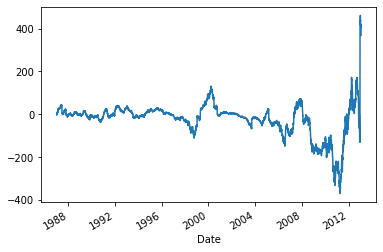

In [30]:
#======= 7 ========
high = df['High']

diff = high - high.shift(-365)
diff.plot()

<AxesSubplot:xlabel='Date'>

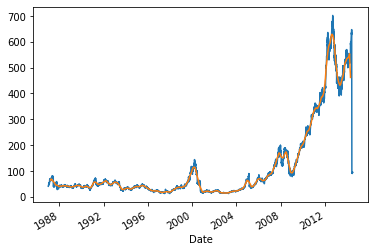

In [32]:
#======= 8 ========
apple_close = df['Close']
rolling = apple_close.rolling(100, center = True).mean()

apple_close.plot()
rolling.plot()

In [33]:
#======= 9 ========
import pandas_datareader as pdr
microsoft = pdr.DataReader('MSFT', start='2000', end='2014', data_source='yahoo')
microsoft.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1999-12-31,58.8750,58.1250,58.75000,58.37500,12517600.0,36.991508
2000-01-03,59.3125,56.0000,58.68750,58.28125,53228400.0,36.932102
2000-01-04,58.5625,56.1250,56.78125,56.31250,54119000.0,35.684532
2000-01-05,58.1875,54.6875,55.56250,56.90625,64059600.0,36.060772
2000-01-06,56.9375,54.1875,56.09375,55.00000,54976600.0,34.852810


In [34]:
mic_close = microsoft['Close']
mic_first_close = mic_close[1]
print(mic_first_close)

58.28125


In [35]:
apple_close = apple_close['2000':]
apple_close.head()

apple_first_close = apple_close[0]
print(apple_first_close)

111.94


<AxesSubplot:xlabel='Date'>

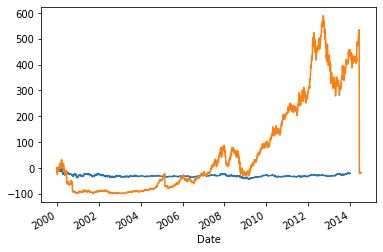

In [38]:
mic_return = mic_close - mic_first_close
apple_return = apple_close - apple_first_close
 
mic_return.plot()
apple_return.plot()